<a href="https://colab.research.google.com/github/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10/blob/main/experiments/train_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Env**

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10.git

# **Import**

In [45]:
# Imports
import sys
import os
import torch
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import make_grid

# Add the root directory of the cloned repository to the Python path
sys.path.append('/content/Comparative-analysis-of-Generative-models-on-CIFAR-10')

import importlib
import data.cifar10 as cifar10_module
import utils.checkpointer as checkpointer_module
import train.train as train_module
import models.VAE_models.conv_vae as conv_vae_module
import samplers.vae_sampler as vae_sampler_module
import utils.weight_init as weight_module
import models.VAE_models.vqvae as vqvae_module
import models.VAE_models.pixelcnn as pixelcnn_module
import models.VAE_models.vaegan as vaegan_module
importlib.reload(cifar10_module)
importlib.reload(checkpointer_module)
importlib.reload(train_module)
importlib.reload(conv_vae_module)
importlib.reload(vae_sampler_module)
importlib.reload(weight_module)
importlib.reload(vqvae_module)
importlib.reload(pixelcnn_module)
importlib.reload(vaegan_module)
from data.cifar10 import load_cifar10
from utils.checkpointer import Checkpointer
from train.train import Train
from models.VAE_models.conv_vae import ConvVAE
from samplers.vae_sampler import vae_sample
from utils.weight_init import WeightsInitializer
from models.VAE_models.vqvae import VQVAE
from models.VAE_models.pixelcnn import PixelCNN
from models.VAE_models.vaegan import VAEGAN

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


# **Load Cifar Data**

In [3]:
train_loader, _ = load_cifar10(batch_size=128)

100%|██████████| 170M/170M [00:08<00:00, 20.3MB/s]


In [4]:
import matplotlib.pyplot as plt
from torchvision import transforms

# Convert to HWC for plotting
def show_img(img):
  if img.dim() == 4:
      img = img[0]
  img = img.detach().cpu()
  img = img.clamp(0,1)
  img = img.permute(1,2,0)  # CHW -> HWC
  plt.figure(figsize=(4,4))
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  plt.show()

# **Train VaeGan**

In [46]:
%%capture
model = VAEGAN().to(device)
# Modify the compute_LDis_llike method in the VAEGAN model to detach discriminator output
# This is done by dynamically modifying the class method. In a real scenario,
# you would modify the source file directly.
def new_compute_LDis_llike(self, x, x_tilde):
    d_tilde = self.discriminator(x_tilde).detach() # Detach here
    LDis_llike = -torch.mean(torch.log(d_tilde))
    return LDis_llike

# VAEGAN.compute_LDis_llike = new_compute_LDis_llike.__get__(model, VAEGAN)

model.apply(WeightsInitializer())

In [ ]:
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/VaeGan"
checkpointer = Checkpointer(checkpoint_dir,"VaeGan",1,False)
train = Train(model,200,train_loader,checkpointer,device)
train.load_checkpoint()
# torch.autograd.set_detect_anomaly(True)
train.train()

Loaded latest checkpoint: /content/drive/MyDrive/checkpoints_final/VaeGan/VaeGan_epoch_146.pt
Epoch: 147  {'total_loss': 2.3077332566461295, 'recon_loss': 0.13105958522966757, 'kld_loss': 0.08181538122236881, 'gan_loss': 0.6962192800953565, 'disc_loss': 1.3986388908322815}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/VaeGan/VaeGan_epoch_147.pt
Epoch: 148  {'total_loss': 2.3075968619350276, 'recon_loss': 0.13069976124998248, 'kld_loss': 0.08205894641864026, 'gan_loss': 0.6952576742452734, 'disc_loss': 1.3995803603735726}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/VaeGan/VaeGan_epoch_148.pt
Epoch: 149  {'total_loss': 2.317954641702535, 'recon_loss': 0.13056421392332868, 'kld_loss': 0.08172049739248002, 'gan_loss': 0.699465149351398, 'disc_loss': 1.4062046617498178}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/VaeGan/VaeGan_epoch_149.pt
Epoch: 150  {'total_loss': 2.31279413352537, 'recon_loss': 0.1308499574470703, 'kld_loss': 0.08110664411426505

In [58]:
images = vae_sample(model.decoder,10)

In [49]:
images.shape

torch.Size([10, 3, 32, 32])

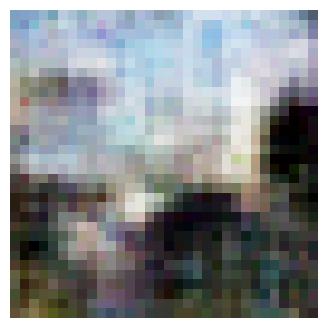

In [65]:
show_img(images[4])

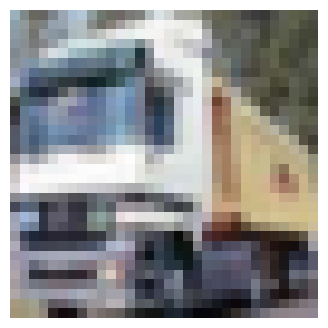

In [18]:
train_dataset = train_loader.dataset
img = train_dataset[1][0]
show_img(img)

In [19]:
# print(img.unsqueeze(0) .shape)
recon, vq_loss, indices = vq_model.forward(img.unsqueeze(0).to(device))

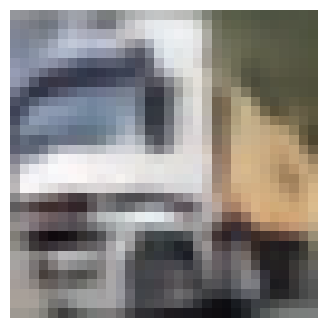

In [20]:
# recon.shape
show_img(recon[0])
# indices.shape

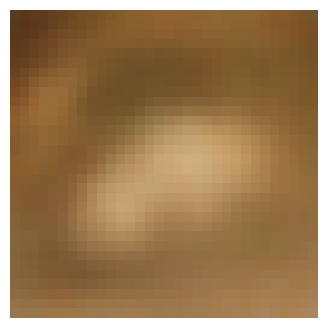

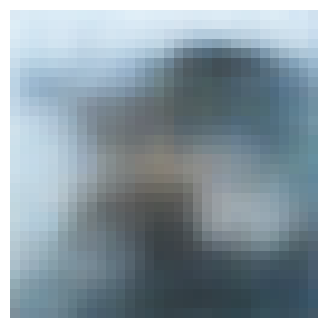

In [ ]:
decoder = model.decoder

x = model.forward(img.unsqueeze(0).to(device))
show_img(x[0])

sample = vae_sample(decoder,1)
show_img(sample[0])